**<font size="4">Welcome to the EDA and Prediction world!</font>**

<font size="3">Importing Libraries</font>

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<font size="3">Reading Data</font>

In [4]:
data = pd.read_csv('Iris.csv')

In [5]:
data.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


**As there is no need for 'ID' column of the dataset, we will delete it!**

In [6]:
del data['Id']

In [7]:
data.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<font size="3">Statistical Analysis of Data</font>

In [8]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 5.9+ KB


**<font size="2">Total number of Null Values</font>**

In [10]:
data.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

**<font size="2">Replacing the Categorical Variable with numbers!</font>**

In [14]:
replace_map = {'Species': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-verginica': 3}}
labels = data['Species'].astype('category').cat.categories.tolist()
replace_map_comp = {'Species' : {k: v for k,v in zip(labels,list(range(1,len(labels)+1)))}}
data_new = data.copy()
# Copy of original data, so that it must not get affected by modification
data_new.replace(replace_map_comp, inplace=True)

In [15]:
print(replace_map_comp)
# This is the encoding of categorical variable

{'Species': {'Iris-setosa': 1, 'Iris-versicolor': 2, 'Iris-virginica': 3}}


**<font size="2">New Data, modified one...</font>**

In [17]:
data_new.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


**<font size="2">Shape(rows,columns)</font>**

In [42]:
data_new.shape

(150, 5)

**<font size="3">Scatter Plots</font>**

<function matplotlib.pyplot.show(*args, **kw)>

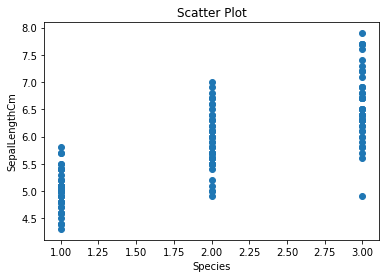

In [43]:
plt.scatter(data_new['Species'],data_new['SepalLengthCm'])
plt.xlabel('Species')
plt.ylabel('SepalLengthCm')
plt.title('Scatter Plot')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

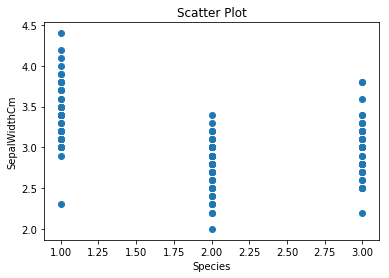

In [44]:
plt.scatter(data_new['Species'],data_new['SepalWidthCm'])
plt.xlabel('Species')
plt.ylabel('SepalWidthCm')
plt.title('Scatter Plot')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

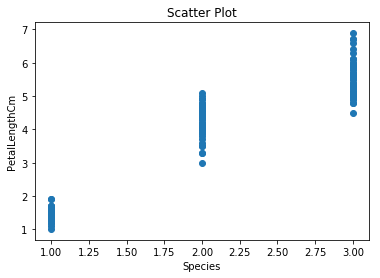

In [45]:
plt.scatter(data_new['Species'],data_new['PetalLengthCm'])
plt.xlabel('Species')
plt.ylabel('PetalLengthCm')
plt.title('Scatter Plot')
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

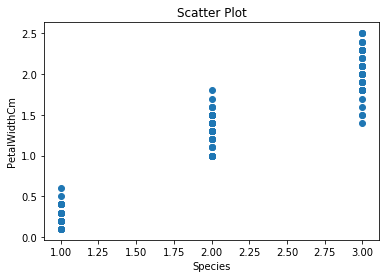

In [46]:
plt.scatter(data_new['Species'],data_new['PetalWidthCm'])
plt.xlabel('Species')
plt.ylabel('PetalWidthCm')
plt.title('Scatter Plot')
plt.show

**<font size="3">Heatmap--> Correlation between features</font>**

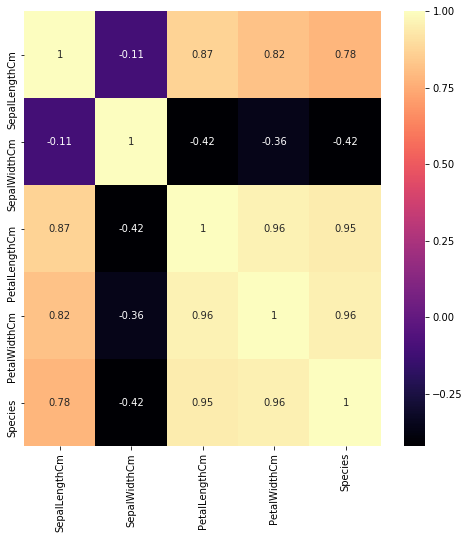

In [47]:
f,ax = plt.subplots(figsize=(8,8))
sns.heatmap(data_new.corr(),annot=True,cmap='magma')
# all variables are highly correlated to species, whether +ve or -ve.

**<font size="3">Pairplot</font>**

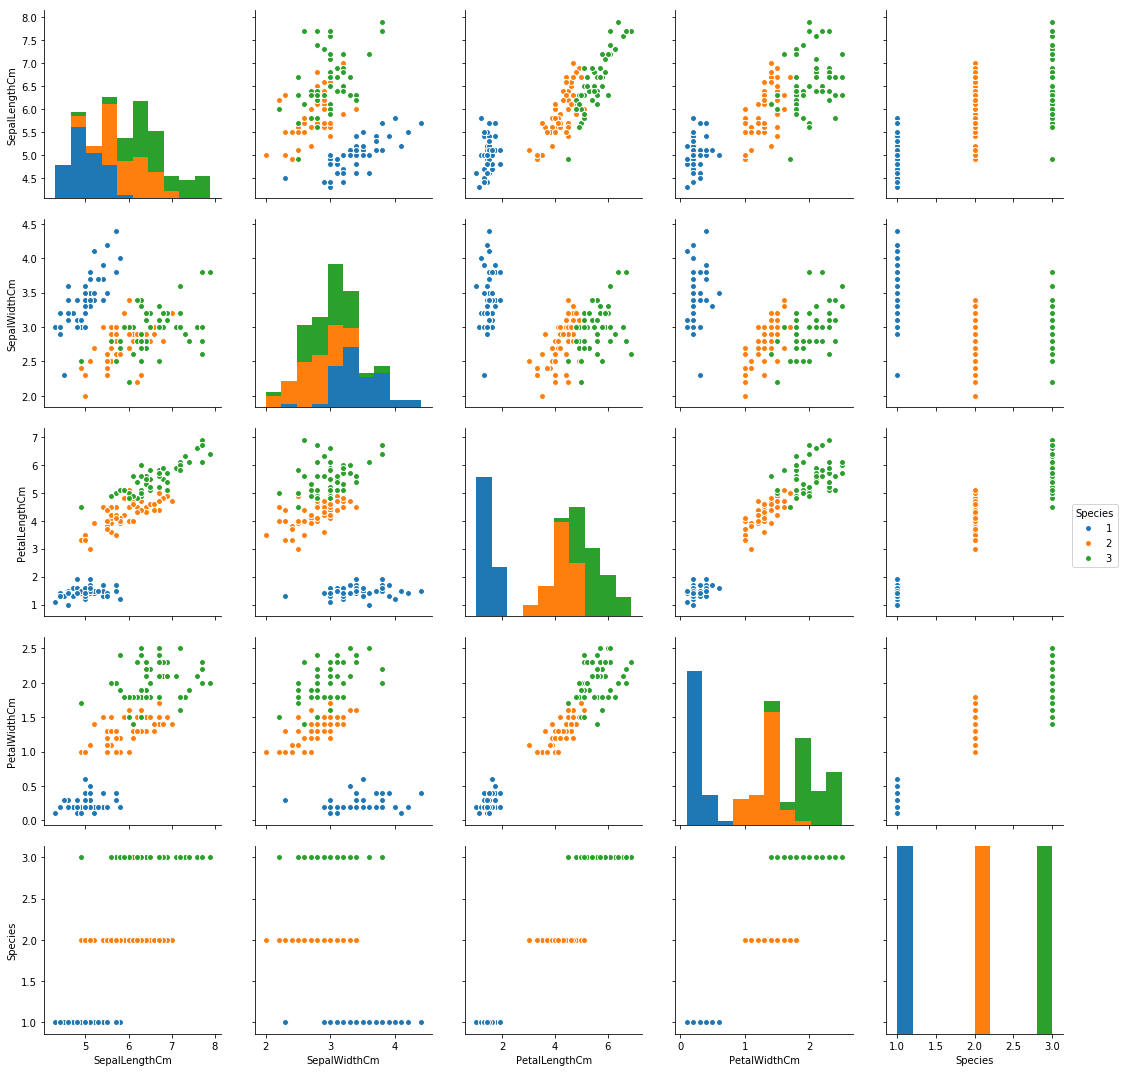

In [48]:
sns.pairplot(data_new, hue="Species", size=3)
# sns.pairplot(iris.drop("Id", axis=1), hue="Species", size=3, diag_kind="kde")
# Used for comparing two variables at a time
# each will have a plot against others as well as itself

**<font size="3">Facetgrid</font>**

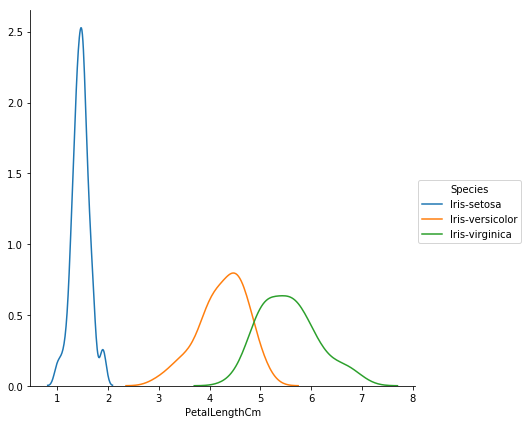

In [49]:
sns.FacetGrid(data, hue="Species", size=6).map(sns.kdeplot, "PetalLengthCm").add_legend()

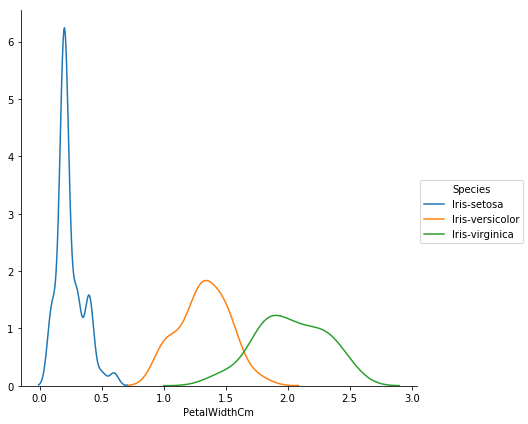

In [50]:
sns.FacetGrid(data, hue="Species", size=6).map(sns.kdeplot, "PetalWidthCm").add_legend()

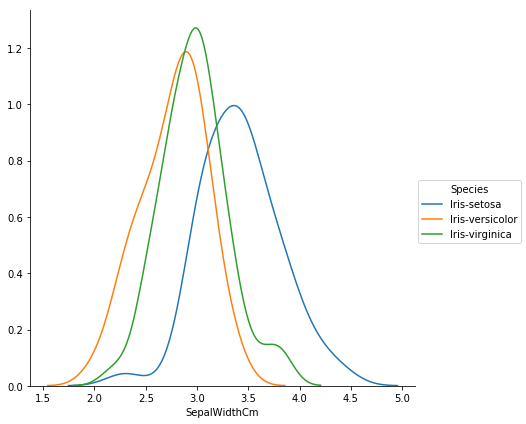

In [51]:
sns.FacetGrid(data, hue="Species", size=6).map(sns.kdeplot, "SepalWidthCm").add_legend()

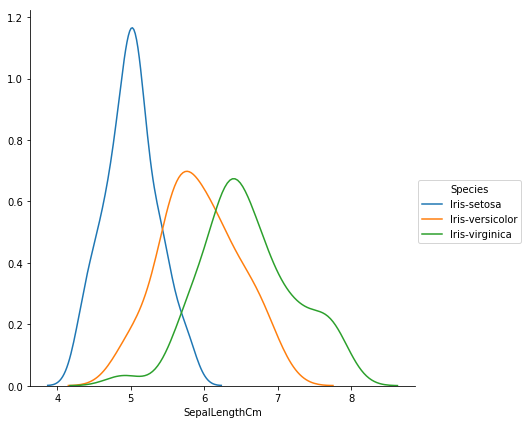

In [52]:
sns.FacetGrid(data, hue="Species", size=6).map(sns.kdeplot, "SepalLengthCm").add_legend()

**<font size="3">Machine Learning</font>**

In [18]:
X = data_new.iloc[:,:4].values
y = data_new.iloc[:,-1].values
# data into Input and Output features

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,shuffle=True,random_state=100)
# Splitting into Train and Test sets

**<font size="3">Support Vector Machines</font>**

In [55]:
from sklearn.svm import SVC
classifier = SVC()
classifier.fit(X_train,y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [56]:
y_pred = classifier.predict(X_test)

**<font size="3">Evaluation of Model</font>**

In [57]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report
print('Confusion Matrix: ',confusion_matrix(y_test,y_pred))
print()
print('Accuracy Score: ',accuracy_score(y_test,y_pred))
print()
print(classification_report(y_test,y_pred))

Confusion Matrix:  [[11  0  0]
 [ 0  5  1]
 [ 0  0 13]]

Accuracy Score:  0.9666666666666667

             precision    recall  f1-score   support

          1       1.00      1.00      1.00        11
          2       1.00      0.83      0.91         6
          3       0.93      1.00      0.96        13

avg / total       0.97      0.97      0.97        30



**<font size="3">Gridsearch CV</font>**

<font size="2">Shuffling of data</font>

In [58]:
from sklearn.utils import shuffle
X,y = shuffle(X,y,random_state=0)

<font size="2">Different parameters of SVM tested</font>

In [61]:
param_grid = [{'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': [1,0.1,0.01,0.001,0.0001], 'kernel': ['rbf']},
              {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'kernel': ['linear']}]
# param_grid = {'C': [0.1, 0.5, 1, 5, 10, 50, 100, 500, 1000], 'gamma': ['auto'], 'kernel': ['rbf']}

In [69]:
from sklearn.model_selection import GridSearchCV
grid=GridSearchCV(estimator=SVC(), param_grid=param_grid, scoring='accuracy',cv=10, verbose=1, refit=True,n_jobs=-1)
grid_search = grid.fit(X, y)

Fitting 10 folds for each of 54 candidates, totalling 540 fits


[Parallel(n_jobs=-1)]: Done 540 out of 540 | elapsed:    3.4s finished


<font size="3">Best parameter set</font>

In [70]:
grid_search.best_params_

{'C': 0.5, 'kernel': 'linear'}

In [71]:
grid_search.best_score_

0.9866666666666667

**<font size="5">Completed! Thanks.</font>**

<font size="3">Please upvote the Kernel if it helped you.</font>